# Data preprocessing ,Data Analysis and training model

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
patients = pd.read_csv('../myCSV/modified_patients.csv')
print('Total shape : ',patients.shape)
patients.rename(columns = {'COUNTY':'COUNTRY'}, inplace = True)
patients.head()

Total shape :  (1171, 15)


,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTRY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,999-76-6866,José Eduardo181,Gómez206,white,hispanic,M,Marigot Saint Andrew Parish DM,Chicopee,Massachusetts,Hampden County,271227.08,1334.88,1.0
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,999-73-5361,Milo271,Feil794,white,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,793946.01,3204.49,0.0
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,999-27-3385,Jayson808,Fadel536,white,nonhispanic,M,Springfield Massachusetts US,Chicopee,Massachusetts,Hampden County,574111.90,2606.40,0.0
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,999-85-4926,Mariana775,Rutherford999,white,nonhispanic,F,Yarmouth Massachusetts US,Lowell,Massachusetts,Middlesex County,935630.30,8756.19,0.0
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,999-60-7372,Gregorio366,Auer97,white,nonhispanic,M,Patras Achaea GR,Boston,Massachusetts,Suffolk County,598763.07,3772.20,0.0


Extracting Age using BIRTHDATE 

In [3]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [4]:
patients['Age'] = patients['BIRTHDATE'].apply(age)
patients[['BIRTHDATE','Age']].head()

,BIRTHDATE,Age
0,1989-05-25,32
1,1983-11-14,38
2,1992-06-02,29
3,1978-05-27,43
4,1996-10-18,25


In [5]:
patients.drop('BIRTHDATE',axis = 1 , inplace = True)
patients.isnull().sum()

Id                      0
SSN                     0
FIRST                   0
LAST                    0
RACE                    0
ETHNICITY               0
GENDER                  0
BIRTHPLACE              0
CITY                    0
STATE                   0
COUNTRY                 0
HEALTHCARE_EXPENSES     0
HEALTHCARE_COVERAGE     0
non_adherence          19
Age                     0
dtype: int64

#### Rows in which non-adherence value is NULL will be treated as final testing dataset. So seperating it in the starting and will be working further with df having no NULL values.

In [6]:
final_testing_dataset = patients[patients['non_adherence'].isnull()]
df = patients[patients['non_adherence'].notnull()]
df['non_adherence'] = df['non_adherence'].apply(np.int64)
final_testing_dataset.shape

(19, 15)

In [7]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [8]:
print('Number of unique patients = ',df['Id'].nunique())
print('Number of records = ',df.shape[0])

Number of unique patients =  1152
Number of records =  1152


Since, Number of unique patients = Number of records. Hence , each row contains data of a different patient

In [9]:
df.shape

(1152, 15)

#### Seperating training data set , for performing Exploratory Data Analysis

In [10]:
train, validate, test = np.split(df.sample(frac=1, random_state=42),[int(.9*len(df)), int(.95*len(df))])
train.head()

,Id,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTRY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence,Age
181,1c3fea30-6be0-419a-b342-50767fd55440,999-76-5683,Adela471,Llamas954,white,hispanic,F,Puebla Puebla MX,Worcester,Massachusetts,Worcester County,791234.65,4830.05,1,36
769,51f196eb-b11e-493e-ad95-254285af055e,999-89-8579,Cleopatra935,Grant908,white,nonhispanic,F,Lynn Massachusetts US,Newton,Massachusetts,Middlesex County,1158561.10,7300.88,1,58
597,eaf6eec1-84ec-454e-8a9a-eafd13da4241,999-17-5888,Jacques50,Swift555,white,nonhispanic,M,New Bedford Massachusetts US,Raynham,Massachusetts,Bristol County,1459993.46,7894.17,1,82
249,8a9df121-e012-457c-ade0-ead804d93818,999-25-3475,Juli424,Barton704,white,nonhispanic,F,Ware Massachusetts US,West Springfield,Massachusetts,Hampden County,1506442.89,18176.42,1,98
730,26ca976d-0b5b-4662-af41-535ff670dd5a,999-70-4950,Shanti441,Lesch175,white,nonhispanic,F,Boston Massachusetts US,Amherst,Massachusetts,Hampshire County,124730.77,2187.36,1,7


In [11]:
print(train.shape)
print(test.shape)
print(validate.shape)

(1036, 15)
(58, 15)
(58, 15)


# Exploratory Data Analysis

In [12]:
#Printing number of unique values in of each column
for col in train:
    print(col ,' : ' ,train[col].nunique())

Id  :  1036
SSN  :  1036
FIRST  :  887
LAST  :  465
RACE  :  5
ETHNICITY  :  2
GENDER  :  2
BIRTHPLACE  :  283
CITY  :  229
STATE  :  1
COUNTRY  :  14
HEALTHCARE_EXPENSES  :  1036
HEALTHCARE_COVERAGE  :  959
non_adherence  :  2
Age  :  101


<AxesSubplot:xlabel='RACE', ylabel='count'>

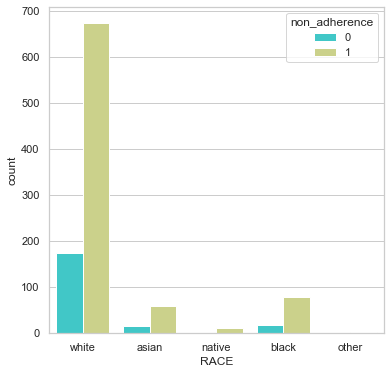

In [13]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='RACE', hue='non_adherence',palette="rainbow")
# we can conclude that maximum non_adherence was observed in white Race
# Also we can conclude that people with Race as white are much more than that of other races. 
# So this can be used while handling Race variable. We will encode White as 1 and non-Whites as 0.

<AxesSubplot:xlabel='GENDER', ylabel='non_adherence'>

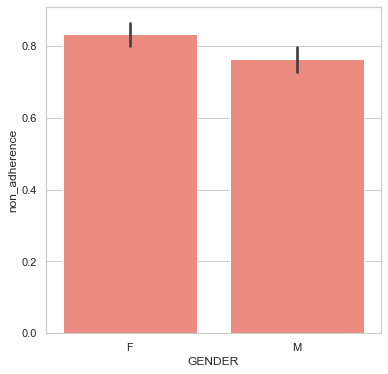

In [14]:
sns.set_theme(style="whitegrid")
sns.barplot(x = train['GENDER'], y = train['non_adherence'],color="salmon",saturation=.8)
# Females are slightly more non - adherent than males

<AxesSubplot:xlabel='count', ylabel='COUNTRY'>

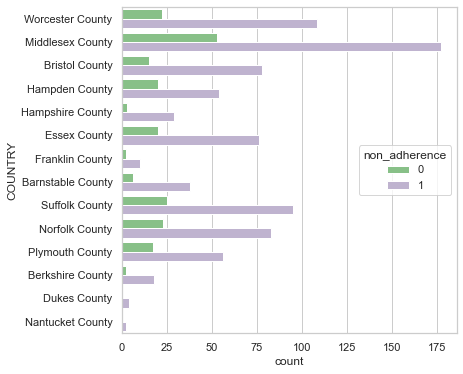

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, y='COUNTRY', hue='non_adherence',palette="Accent")
# Maximum patients are from Middlesex COUNTRY

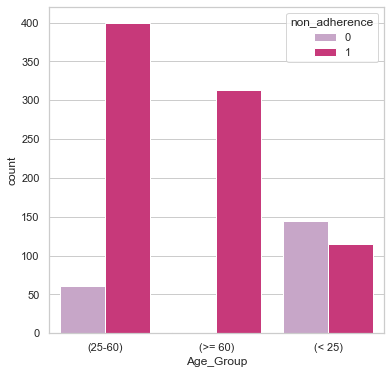

In [16]:
def Mapping_delay(x):
    temp = []
    for i in list(x):
        if i >= 60:
            temp.append("(>= 60)")
        elif (i >= 25 and i < 60):
            temp.append("(25-60)")
        else:
            temp.append("(< 25)")
    return temp

train['Age_Group'] = Mapping_delay(train['Age'])

sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Age_Group',hue='non_adherence',palette="PuRd")
train.drop('Age_Group',axis = 1, inplace = True)
#From the graph we can clearly see that the people who age than 60, major portion is non - adherent.
# Hence senior citizen are non - adherent

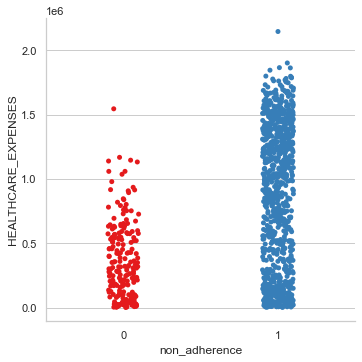

In [17]:
sns.set_theme(style="whitegrid")
sns.catplot(x="non_adherence", y="HEALTHCARE_EXPENSES", data=train,palette="Set1")
#From this graph , we can conclude that the expenses of pateits who are non_adherent are more
# Hence cost plays a major role in determining adherence

#### Determining Outliers 

<AxesSubplot:xlabel='HEALTHCARE_EXPENSES'>

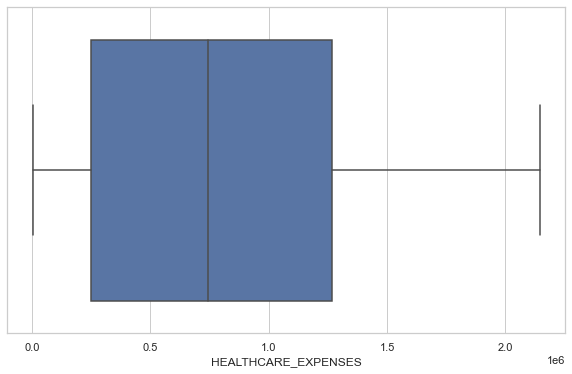

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["HEALTHCARE_EXPENSES"])
#No such outliers

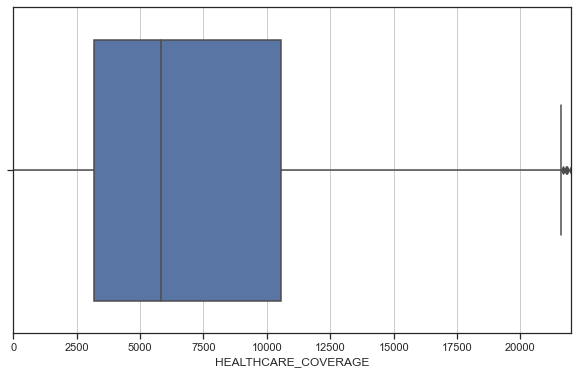

In [19]:
sns.set(style="ticks")
plt.figure(figsize=(10,6))
sns.boxplot(x=train["HEALTHCARE_COVERAGE"])
plt.xlim(0, 22000)
plt.grid()
plt.show()

In [20]:
# Droping records from dataframe having HEALTHCARE_COVERAGE outside outliers
df.drop(df[df['HEALTHCARE_COVERAGE'] > 22000].index, inplace = True)

# Handling Categorical DataTypes

In [21]:
print(df.columns)

Index(['Id', 'SSN', 'FIRST', 'LAST', 'RACE', 'ETHNICITY', 'GENDER',
       'BIRTHPLACE', 'CITY', 'STATE', 'COUNTRY', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'non_adherence', 'Age'],
      dtype='object')


#### First droping columns that would be not play any role in training model <br> Hence droping columns -> Id , SSN , FIRST ,LAST

In [22]:
df.drop(['Id','SSN','FIRST','LAST'], axis = 1, inplace = True)

In [23]:
for col in df:
    print(col ,' : ' ,df[col].nunique() , ' , Dtype : ', df[col].dtypes)

RACE  :  5  , Dtype :  object
ETHNICITY  :  2  , Dtype :  object
GENDER  :  2  , Dtype :  object
BIRTHPLACE  :  281  , Dtype :  object
CITY  :  233  , Dtype :  object
STATE  :  1  , Dtype :  object
COUNTRY  :  14  , Dtype :  object
HEALTHCARE_EXPENSES  :  1053  , Dtype :  float64
HEALTHCARE_COVERAGE  :  964  , Dtype :  float64
non_adherence  :  2  , Dtype :  int64
Age  :  98  , Dtype :  int64


In [24]:
# Since STATE only has one value throught the column (Massachusetts), it would be useless to use it in training model.
# Hence, droping STATE
df.drop(['STATE'], axis = 1, inplace = True)

In [25]:
# Since GENDER only has 2 unique values -> M and F. So we can simply use One-Hot encoding using pandas get_dummies method
gender_encoded=pd.get_dummies(data=df['GENDER'],prefix='GENDER',drop_first=True)
df.drop('GENDER',axis = 1,inplace=True)
df = pd.concat([gender_encoded,df],axis = 1)

In [26]:
#Since ETHNICITY only has 2 unique values, we can simply use One-Hot encoding using pandas get_dummies method
ETHNICITY_encoded=pd.get_dummies(data=df['ETHNICITY'],prefix='ETHNICITY',drop_first=True)
df.drop('ETHNICITY',axis = 1,inplace=True)
df = pd.concat([ETHNICITY_encoded,df],axis = 1)

In [27]:
#As number of White has much values as compared to that of others, we would be performing one hot encoding,
#and then droping all categories except White. 

#Doing this we will successfull encode our model into 2 categories -> White and rest.

RACE_encoded=pd.get_dummies(data=df['RACE'],prefix='RACE',drop_first=True)
df.drop('RACE',axis = 1,inplace=True)
df = pd.concat([RACE_encoded,df],axis = 1)
df.drop(['RACE_black','RACE_native','RACE_other'],axis = 1, inplace = True)
df.head()

,RACE_white,ETHNICITY_nonhispanic,GENDER_M,BIRTHPLACE,CITY,COUNTRY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence,Age
0,1,0,1,Marigot Saint Andrew Parish DM,Chicopee,Hampden County,271227.08,1334.88,1,32
1,1,1,1,Danvers Massachusetts US,Somerville,Middlesex County,793946.01,3204.49,0,38
2,1,1,1,Springfield Massachusetts US,Chicopee,Hampden County,574111.90,2606.40,0,29
3,1,1,0,Yarmouth Massachusetts US,Lowell,Middlesex County,935630.30,8756.19,0,43
4,1,1,1,Patras Achaea GR,Boston,Suffolk County,598763.07,3772.20,0,25


#### Frequency Encoding on CITY,  COUNTRY, BIRTHPLACE

In [28]:
fe = df.groupby('CITY').size()/len(df)
df['CITY_Encoded'] = df['CITY'].map(fe)

In [29]:
fe = df.groupby('COUNTRY').size()/len(df)
df['COUNTRY_Encoded'] = df['COUNTRY'].map(fe)

In [30]:
fe = df.groupby('BIRTHPLACE').size()/len(df)
df['BIRTHPLACE_Encoded'] = df['BIRTHPLACE'].map(fe)

In [31]:
df.drop(['CITY','COUNTRY','BIRTHPLACE'],axis = 1,inplace=True)
df.head()

,RACE_white,ETHNICITY_nonhispanic,GENDER_M,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence,Age,CITY_Encoded,COUNTRY_Encoded,BIRTHPLACE_Encoded
0,1,0,1,271227.08,1334.88,1,32,0.011396,0.066477,0.001899
1,1,1,1,793946.01,3204.49,0,38,0.012346,0.218424,0.007597
2,1,1,1,574111.90,2606.40,0,29,0.011396,0.066477,0.020893
3,1,1,0,935630.30,8756.19,0,43,0.016144,0.218424,0.001899
4,1,1,1,598763.07,3772.20,0,25,0.096866,0.112061,0.001899


# Feature Selection

In [32]:
train, validate, test = np.split(df.sample(frac=1, random_state=42),[int(.9*len(df)), int(.95*len(df))])
print(train.shape)
print(test.shape)
print(validate.shape)

(947, 10)
(53, 10)
(53, 10)


In [33]:
X_train = train.drop('non_adherence',axis = 1)
y_train = train['non_adherence']
X_train.head()
X_test = test.drop('non_adherence',axis = 1)
y_test = test['non_adherence']

X_validate = validate.drop('non_adherence',axis = 1)
y_validate = validate['non_adherence']

X_train.head()

,RACE_white,ETHNICITY_nonhispanic,GENDER_M,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Age,CITY_Encoded,COUNTRY_Encoded,BIRTHPLACE_Encoded
431,1,1,0,247832.53,2868.16,12,0.018044,0.093067,0.000950
104,1,0,1,808765.24,8690.64,40,0.096866,0.112061,0.002849
1072,1,1,1,1238871.62,4107.92,58,0.016144,0.093067,0.078822
1169,1,1,0,1375833.47,13157.00,107,0.006648,0.107312,0.020893
64,1,1,0,626389.54,6614.40,29,0.003799,0.218424,0.005698


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20 ,random_state = 10)
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

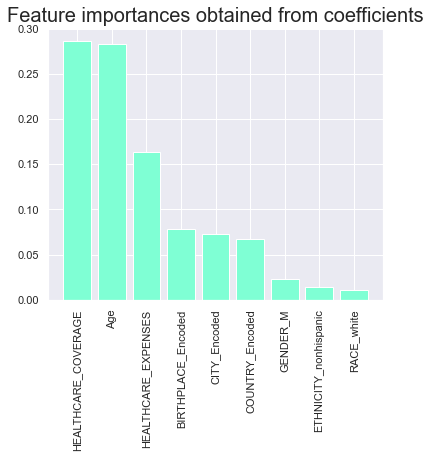

In [35]:
sns.set(rc={'figure.figsize':(6,5)})
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#7FFFD4')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### From the above observation, we can see that there is no such column that does'nt play role in training.

# Selecting correct Model

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_predict = model_logistic.predict(X_validate)
print(accuracy_score(y_validate, y_predict))

0.8113207547169812


#### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
y_predict = Naive_Bayes.predict(X_validate)  
print(accuracy_score(y_validate, y_predict))

0.7924528301886793


#### K-Nearest Neighbor Algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_validate)  
print(accuracy_score(y_validate, y_predict))

0.7547169811320755


#### SVM

In [39]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_predict = knn.predict(X_validate)  
print(accuracy_score(y_validate, y_predict))

0.7547169811320755


#### Decision Tree

In [40]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_validate)  
print(accuracy_score(y_validate, y_predict))

0.8490566037735849


#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_validate)  
print(accuracy_score(y_validate, y_predict))

0.8490566037735849


### From above accuracy score, we can conclude that both decision tree and random forest classifier performs the best


# Preparing and Prediction of final_testing_dataset

In [42]:
# Dataset had all the values of non_adherence as Nan
final_testing_dataset.head(3)

,Id,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTRY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,non_adherence,Age
7,01207ecd-9dff-4754-8887-4652eda231e2,999-81-4349,Karyn217,Mueller846,white,nonhispanic,F,New Bedford Massachusetts US,Colrain,Massachusetts,Franklin County,26400.0,774.96,NaN,2
36,f592e861-6e2e-46bc-a19d-5485fcbf0d80,999-65-5107,Dorothea248,Ward668,white,nonhispanic,F,New Bedford Massachusetts US,Lowell,Massachusetts,Middlesex County,39600.0,1033.28,NaN,3
57,b44d4f15-d604-4e24-8114-dc0dc12651d2,999-72-2409,Leslee214,Schumm995,white,nonhispanic,F,Springfield Massachusetts US,Boston,Massachusetts,Suffolk County,6300.0,258.32,NaN,1


In [43]:
final_testing_dataset.drop(['Id','SSN','FIRST','LAST','STATE','non_adherence'], axis = 1, inplace = True)

#### Handling Categorical DataTypes

In [44]:
#### One Hot encoding on GENDER, ETHNICITY, RACE
gender_encoded=pd.get_dummies(data=final_testing_dataset['GENDER'],prefix='GENDER',drop_first=True)
final_testing_dataset.drop('GENDER',axis = 1,inplace=True)
final_testing_dataset = pd.concat([gender_encoded,final_testing_dataset],axis = 1)

ETHNICITY_encoded=pd.get_dummies(data=final_testing_dataset['ETHNICITY'],prefix='ETHNICITY',drop_first=True)
final_testing_dataset.drop('ETHNICITY',axis = 1,inplace=True)
final_testing_dataset = pd.concat([ETHNICITY_encoded,final_testing_dataset],axis = 1)

RACE_encoded=pd.get_dummies(data=final_testing_dataset['RACE'],prefix='RACE',drop_first=True)
final_testing_dataset.drop('RACE',axis = 1,inplace=True)
final_testing_dataset = pd.concat([RACE_encoded,final_testing_dataset],axis = 1)
final_testing_dataset.head()

#### Frequency Encoding on CITY, COUNTRY, BIRTHPLACE

fe = final_testing_dataset.groupby('CITY').size()/len(final_testing_dataset)
final_testing_dataset['CITY_Encoded'] = final_testing_dataset['CITY'].map(fe)

fe = final_testing_dataset.groupby('COUNTRY').size()/len(final_testing_dataset)
final_testing_dataset['COUNTRY_Encoded'] = final_testing_dataset['COUNTRY'].map(fe)

fe = final_testing_dataset.groupby('BIRTHPLACE').size()/len(final_testing_dataset)
final_testing_dataset['BIRTHPLACE_Encoded'] = final_testing_dataset['BIRTHPLACE'].map(fe)

final_testing_dataset.drop(['CITY','COUNTRY','BIRTHPLACE'],axis = 1,inplace=True)
final_testing_dataset.head()

,RACE_white,ETHNICITY_nonhispanic,GENDER_M,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Age,CITY_Encoded,COUNTRY_Encoded,BIRTHPLACE_Encoded
7,1,1,0,26400.0,774.96,2,0.052632,0.052632,0.105263
36,1,1,0,39600.0,1033.28,3,0.052632,0.263158,0.105263
57,1,1,0,6300.0,258.32,1,0.157895,0.157895,0.052632
98,1,0,0,5400.0,258.32,1,0.157895,0.157895,0.052632
146,1,1,0,56700.0,1162.44,3,0.052632,0.263158,0.052632


#### Performance of X_test data set

In [45]:
y_predict = dtc.predict(X_test)  
print(accuracy_score(y_test, y_predict))

0.7169811320754716


#### Predicting values on final_testing_dataset

In [46]:
final_testing_dataset['Predicted_non_adherence'] = dtc.predict(final_testing_dataset)  

In [47]:
# Predicted values
final_testing_dataset['Predicted_non_adherence']

7       0
36      0
57      0
98      0
146     0
154     0
162     0
201     0
213     0
313     0
430     0
499     0
528     0
612     1
678     0
773     0
849     0
987     0
1157    0
Name: Predicted_non_adherence, dtype: int64

#### Dumping Model as .pickle

In [48]:
# import pickle
# pickle.dump(dtc, open('../Trained Model/AdherenceModel', 'wb'))

In [51]:
#Taking an example 
# Name : Shivam
# Age : 21
# Race : Asian
# ethnicity: nonhispanic
# gender : Male
# HEALTHCARE_EXPENSES : 200000
# HEALTHCARE_COVERAGE : 10000
#CITY :0.052632
#COUNTRY : 0.052632
#BIRTHPLACE : 0.105263

In [54]:
df_user = pd.DataFrame({"RACE_white":[1],"ETHNICITY_nonhispanic":[1], "GENDER_M":[1],"HEALTHCARE_EXPENSES":[200000],"HEALTHCARE_COVERAGE":[10000],"Age":[21],"CITY_Encoded":[0.052632],"COUNTRY_Encoded":[0.052632],"BIRTHPLACE_Encoded":[0.105263]})
df_user.head()

,RACE_white,ETHNICITY_nonhispanic,GENDER_M,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Age,CITY_Encoded,COUNTRY_Encoded,BIRTHPLACE_Encoded
0,1,1,1,200000,10000,21,0.052632,0.052632,0.105263


In [55]:
dtc.predict(df_user)  

array([1], dtype=int64)